<a href="https://colab.research.google.com/github/jeffreymas/Deteksi-Penyakit-tanaman/blob/master/DeteksiPenyakit_tanaman_Vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a Plant Disease Diagnosis Model with PlantVillage Dataset

In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('default')
from skimage.io import imread
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


import keras
import keras.backend as K
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.utils.np_utils import to_categorical

from keras.applications.vgg16 import VGG16
from keras.utils.data_utils import get_file

from keras import layers
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint


from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Persiapan

## Pengambilan Data 

In [0]:
!apt-get install subversion > /dev/null

#Retreive specifc diseases of tomato for training
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Bacterial_spot image/Tomato___Bacterial_spot　>  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Early_blight image/Tomato___Early_blight　>  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Late_blight image/Tomato___Late_blight　>  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Septoria_leaf_spot image/Tomato___Septoria_leaf_spot　>  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Target_Spot image/Tomato___Target_Spot　>  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___healthy image/Tomato___healthy　>  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Tomato_mosaic_virus image/Tomato___mosaic_virus >  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Spider_mites%20Two-spotted_spider_mite image/Tomato___Spider_mites_20Two-spotted_spider_mite >  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Leaf_Mold image/Tomato___Leaf_Mold >  /dev/null
!svn export https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus image/Tomato___Yellow_Leaf_Curl_Virus >  /dev/null
!svn export https://github.com/icassava/fgvcx-icassava/trunk/data/train/cbb image/Cassava___cbb > /dev/null
!svn export https://github.com/icassava/fgvcx-icassava/trunk/data/train/cbsd image/Cassava___cbsd > /dev/null
!svn export https://github.com/icassava/fgvcx-icassava/trunk/data/train/cgm image/Cassava___cgm > /dev/null
!svn export https://github.com/icassava/fgvcx-icassava/trunk/data/train/cmd image/Cassava___cmd > /dev/null
!svn export https://github.com/icassava/fgvcx-icassava/trunk/data/train/healthy image/Cassava___healthy > /dev/null

In [0]:
#folder structure
!ls image

Cassava___cbb		   Tomato___Late_blight　
Cassava___cbsd		   Tomato___Leaf_Mold
Cassava___cgm		   Tomato___mosaic_virus
Cassava___cmd		   Tomato___Septoria_leaf_spot　
Cassava___healthy	   Tomato___Spider_mites_20Two-spotted_spider_mite
Tomato___Bacterial_spot　  Tomato___Target_Spot　
Tomato___Early_blight　    Tomato___Yellow_Leaf_Curl_Virus
Tomato___healthy　


Tomato___Target_Spot　


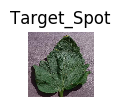

Cassava___healthy


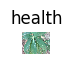

Tomato___Early_blight　


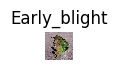

Cassava___cbb


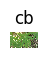

Tomato___Yellow_Leaf_Curl_Virus


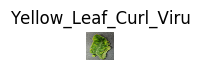

Tomato___Leaf_Mold


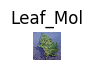

Tomato___Spider_mites_20Two-spotted_spider_mite


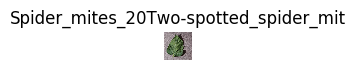

Cassava___cgm


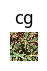

Cassava___cmd


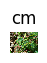

Tomato___Bacterial_spot　


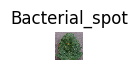

Tomato___Late_blight　


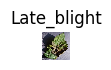

Cassava___cbsd


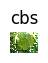

Tomato___mosaic_virus


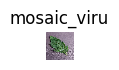

Tomato___healthy　


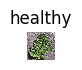

Tomato___Septoria_leaf_spot　


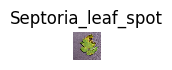

In [0]:
plt.figure(figsize=(15,10))

#visualize several images

parent_directory = "image"

for i, folder in enumerate(os.listdir(parent_directory)):
    print(folder)
    folder_directory = os.path.join(parent_directory,folder)
    files = os.listdir(folder_directory)
    #will inspect only 1 image per folder
    file = files[0] 
    file_path = os.path.join(folder_directory,file)
    
    image = imread(file_path)
    plt.subplot(1,15,i+1)
    plt.imshow(image)
    plt.axis("off")
    
    name = folder.split("___")[1][:-1]
    plt.title(name)
    plt.show()

In [0]:
#load everything into memory
x = []
y = []
class_names = ['Cassava___cbb','Cassava___cbsd','Cassava___cgm','Cassava___cmd','Cassava___healthy','Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___mosaic_virus','Tomato___Septoria_leaf_spot','Tomato___Spider_mites_20Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Yellow_Leaf_Curl_Virus']
parent_directory = "image"

for i,folder in enumerate(class_names):
    print(i,folder)
    class_names.append(folder)
    folder_directory = os.path.join(parent_directory,folder)
    files = os.listdir(folder_directory)
    #will inspect only 1 image per folder
    for file in files:
        file_path = os.path.join(folder_directory,file)
        image = load_img(file_path,target_size=(64,64))
        image = img_to_array(image)/255.
        x.append(image)
        y.append(i)

x = np.array(x)
y = to_categorical(y)

0 Cassava___cbb
1 Cassava___cbsd
2 Cassava___cgm
3 Cassava___cmd
4 Cassava___healthy
5 Tomato___Bacterial_spot
6 Tomato___Early_blight
7 Tomato___healthy
8 Tomato___Late_blight
9 Tomato___Leaf_Mold
10 Tomato___mosaic_virus
11 Tomato___Septoria_leaf_spot
12 Tomato___Spider_mites_20Two-spotted_spider_mite
13 Tomato___Target_Spot
14 Tomato___Yellow_Leaf_Curl_Virus
15 Cassava___cbb
16 Cassava___cbsd
17 Cassava___cgm
18 Cassava___cmd
19 Cassava___healthy
20 Tomato___Bacterial_spot
21 Tomato___Early_blight
22 Tomato___healthy
23 Tomato___Late_blight
24 Tomato___Leaf_Mold
25 Tomato___mosaic_virus
26 Tomato___Septoria_leaf_spot
27 Tomato___Spider_mites_20Two-spotted_spider_mite
28 Tomato___Target_Spot
29 Tomato___Yellow_Leaf_Curl_Virus
30 Cassava___cbb
31 Cassava___cbsd
32 Cassava___cgm
33 Cassava___cmd


KeyboardInterrupt: ignored

In [0]:
#check the data shape
print(x.shape)
print(y.shape)
print(y[0])

In [0]:
x_train, _x, y_train, _y = train_test_split(x,y,test_size=0.2, stratify = y, random_state = 1)
x_valid,x_test, y_valid, y_test = train_test_split(_x,_y,test_size=0.4, stratify = _y, random_state = 1)

print("train data:",x_train.shape,y_train.shape)
print("validation data:",x_valid.shape,y_valid.shape)
print("test data:",x_test.shape,y_test.shape)


## Model Preparation

In [0]:
K.clear_session()

nfilter = 32


#VGG16 like model
model = Sequential([
    #feature extraction layer
    
    #block1
    layers.Conv2D(64,(3,3),padding="same",name="block1_conv1",input_shape=(64,64,3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(64,(3,3),padding="same",name="block1_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block1_pool"),
    #block2
    layers.Conv2D(128,(3,3),padding="same",name="block2_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(128,(3,3),padding="same",name="block2_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block2_pool"),
    #block3
    layers.Conv2D(256,(3,3),padding="same",name="block3_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(256,(3,3),padding="same",name="block3_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(256,(3,3),padding="same",name="block3_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block3_pool"),

    #block4
    layers.Conv2D(512,(3,3),padding="same",name="block4_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block4_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block4_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block4_pool"),

    #block5
    layers.Conv2D(512,(3,3),padding="same",name="block5_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block5_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block5_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block5_pool"),

    layers.Flatten(),
    
    #inference layer
    layers.Dense(512,name="fc1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.5),
    
    layers.Dense(512,name="fc2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),    
    layers.Dropout(0.5),
    
    layers.Dense(15,name="prepredictions"),
    layers.Activation("softmax",name="predictions")
    
])

model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Training

In [0]:
#utilize early stopping function to stop at the lowest validation loss
#es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
#utilize save best weight model during training
ckpt = ModelCheckpoint("DeteksiPenyakitTanaman.hdf5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [0]:
#we will define a generator class for training data and validation data seperately, as no augmentation is not required for validation data
t_gen = ImageDataGenerator(rotation_range=90,horizontal_flip=True)
v_gen = ImageDataGenerator()
train_gen = t_gen.flow(x_train,y_train,batch_size=98)
valid_gen = v_gen.flow(x_valid,y_valid,batch_size=98)

In [0]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch = train_gen.n // 98,
    callbacks = [ckpt],
    #callbacks = [es,ckpt],
    validation_data = valid_gen,
    validation_steps = valid_gen.n // 98,
    
    epochs=5)

## Evaluation

In [0]:
#load the model weight file with lowest validation loss
model.load_weights("DeteksiPenyakitTanaman.hdf5")

In [0]:
#check the model metrics
print(model.metrics_names)
#evaluate training data
print(model.evaluate(x= x_train, y = y_train))
#evaluate  validation data
print(model.evaluate(x= x_valid, y = y_valid))
#evaluate  test data
print(model.evaluate(x= x_test, y = y_test))      

In [0]:
#draw a confusion matrix

#true label
y_true = np.argmax(y_test,axis=1)

#prediction label
Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

print(y_true)
print(y_pred)

In [0]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(9,9))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')



## Predicting Indivisual Images

In [0]:
n = 99 #do not exceed (number of test image - 1)

plt.imshow(x_test[n])
plt.show()

true_label = np.argmax(y_test,axis=1)[n]
print("Gambar Yang Benar Adalah:",true_label,":",class_names[true_label])
prediction = model.predict(x_test[n][np.newaxis,...])[0]
print("prediksi Value:",prediction)
predicted_label = np.argmax(prediction)
print("prediksi gambar:",predicted_label,":",class_names[predicted_label])

if true_label == predicted_label:
    print("Prediksi Benar")
else:
    print("Prediksi Salah")

In [0]:
from keras import backend as K
# This line must be executed before loading Keras model.
K.set_learning_phase(0)

In [0]:
from keras.models import load_model
model = load_model('./DeteksiPenyakitTanaman.hdf5')
print(model.outputs)
print(model.inputs)

In [0]:
import tensorflow as tf
gf = tf.GraphDef()
gf.ParseFromString(open('/content/DeteksiPenyakitTanaman.hdf5','rb').read())
[n.name + '=>' +  n.op for n in gf.node if n.op in ( 'Softmax','Placeholder')]

Membuat File Tensorflow

In [0]:
input_fld = '/content'
weight_file = 'DeteksiPenyakitTanaman.hdf5'
output_node_names_of_input_network = "pred0" #comma separated
write_graph_def_ascii_flag = True
output_node_names_of_final_network = 'output_node' #comma separated
output_graph_name = 'constant_graph_weights.pb'

In [0]:
from keras.models import load_model
import tensorflow as tf
import os
import os.path as osp

output_fld = input_fld + 'tensorflow_model/'
if not os.path.isdir(output_fld):
    os.mkdir(output_fld)
weight_file_path = osp.join(input_fld, weight_file)

In [0]:
net_model = load_model(weight_file_path)

num_output = len(output_node_names_of_input_network.split(','))
pred_node_names = output_node_names_of_final_network.split(',')
pred = [None]*num_output
for i in range(num_output):
    pred[i] = tf.identity(net_model.output[i], name=pred_node_names[i])
print('output nodes names are: ', pred_node_names)

Input Argumen

In [0]:
import argparse
parser = argparse.ArgumentParser(description='set input arguments')
parser.add_argument('-content', action="store", 
                    dest='content', type=str, default='.')
parser.add_argument('-path', action="store", 
                    dest='path', type=str, default='')
parser.add_argument('-input_model_file', action="store", 
                    dest='input_model_file', type=str, default='DeteksiPenyakitTanaman.hdf5')
parser.add_argument('-output_model_file', action="store", 
                    dest='output_model_file', type=str, default='')
parser.add_argument('-to', action="store", 
                    dest='output_graphdef_file', type=str, default='model.ascii')
parser.add_argument('-num_outputs', action="store", 
                    dest='num_outputs', type=int, default=1)
parser.add_argument('-graph_def', action="store", 
                    dest='graph_def', type=bool, default=False)
parser.add_argument('-output_node_prefix', action="store", 
                    dest='output_node_prefix', type=str, default='output_node')
parser.add_argument('-quantize', action="store", 
                    dest='quantize', type=bool, default=False)
parser.add_argument('-theano_backend', action="store", 
                    dest='theano_backend', type=bool, default=False)
parser.add_argument('-f')
args = parser.parse_args()
parser.print_help()
print('input args: ', args)

if args.theano_backend is True and args.quantize is True:
    raise ValueError("Quantize feature does not work with theano backend.")

Inisialisasi

In [0]:
from keras.models import load_model
import tensorflow as tf
from pathlib import Path
from keras import backend as K

path =  args.content if args.path == '' else args.path
if args.output_model_file == '':
    args.output_model_file = str(Path(args.input_model_file).name) + '.pb'
Path(path).mkdir(parents=True, exist_ok=True)    
weight_file_path = str(Path(args.content) / args.input_model_file)

Load keras model and rename output

In [0]:
K.set_learning_phase(0)
if args.theano_backend:
    K.set_image_data_format('channels_first')
else:
    K.set_image_data_format('channels_last')

try:
    net_model = load_model(weight_file_path)
except ValueError as err:
    print('''Input file specified ({}) only holds the weights, and not the model defenition.
    Save the model using mode.save(filename.h5) which will contain the network architecture
    as well as its weights. 
    If the model is saved using model.save_weights(filename.h5), the model architecture is 
    expected to be saved separately in a json format and loaded prior to loading the weights.
    Check the keras documentation for more details (https://keras.io/getting-started/faq/)'''
          .format(weight_file_path))
    raise err
num_output = args.num_outputs
pred = [None]*num_output
pred_node_names = [None]*num_output
for i in range(num_output):
    pred_node_names[i] = args.output_node_prefix+str(i)
    pred[i] = tf.identity(net_model.outputs[i], name=pred_node_names[i])
print('output nodes names are: ', pred_node_names)

In [0]:
sess = K.get_session()

if args.graph_def:
    f = args.output_graphdef_file 
    tf.train.write_graph(sess.graph.as_graph_def(), path, f, as_text=True)
    print('saved the graph definition in ascii format at: ', str(Path(path) / f))

In [0]:
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from tensorflow.tools.graph_transforms import TransformGraph
if args.quantize:
    transforms = ["quantize_weights", "quantize_nodes"]
    transformed_graph_def = TransformGraph(sess.graph.as_graph_def(), [], pred_node_names, transforms)
    constant_graph = graph_util.convert_variables_to_constants(sess, transformed_graph_def, pred_node_names)
else:
    constant_graph = graph_util.convert_variables_to_constants(sess, sess.graph.as_graph_def(), pred_node_names)    
graph_io.write_graph(constant_graph, path, args.output_model_file, as_text=False)
print('saved the freezed graph (ready for inference) at: ', str(Path(output_fld) / args.output_model_file))

In [0]:
import tensorflow as tf
from tensorflow.python.platform import gfile

f = gfile.FastGFile("/content/DeteksiPenyakitTanaman.hdf5.pb", 'rb')
graph_def = tf.GraphDef()
# Parses a serialized binary message into the current message.
graph_def.ParseFromString(f.read())
f.close()

sess = tf.Session()
sess.graph.as_default()
# Import a serialized TensorFlow `GraphDef` protocol buffer
# and place into the current default `Graph`.
tf.import_graph_def(graph_def)